In [1]:
import pandas as pd
import numpy as np

In [2]:
mushrooms_data = pd.read_csv('training_mush.csv')

In [3]:
mushrooms_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [12]:
X = mushrooms_data
X  = X.drop('class', axis=1)

In [13]:
y = mushrooms_data['class']

In [14]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: class, dtype: int64

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf_rf = RandomForestClassifier(random_state=0)

In [19]:
params = {'n_estimators': range(10, 51, 10),
          'max_depth': range(1, 12, 2),
          'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 10, 2)}

In [20]:
clf_gscv = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)

In [22]:
%%time
clf_gscv.fit(X, y)

c:\Users\abelchenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: total: 15.2 s
Wall time: 1min 41s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [24]:
clf_gscv.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [25]:
best_clf = clf_gscv.best_estimator_

In [27]:
feature_importances = best_clf.feature_importances_

In [28]:
feature_importances_df = pd.DataFrame({'features': X.columns,
                                       'feature_importances': feature_importances})

In [29]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [30]:
test_mush = pd.read_csv('testing_mush.csv')

In [31]:
test_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [32]:
predictions = best_clf.predict(test_mush)

In [36]:
predictions

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [39]:
sum(predictions)

976

In [40]:
y_true = pd.read_csv('testing_y_mush.csv')

In [41]:
y_pred = predictions

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

<Axes: >

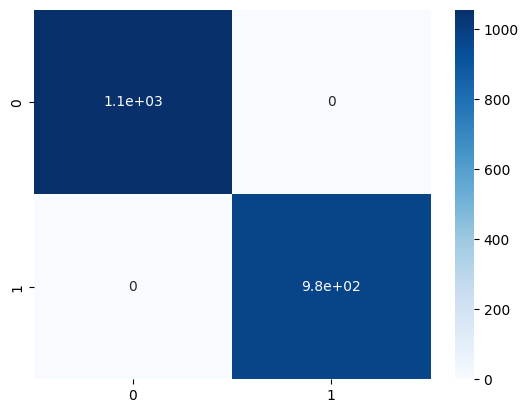

In [45]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")